In [1]:
import numpy as np
from sklearn.ensemble import VotingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
import pandas as pd

In [2]:
# Load the dataset
file_path = 'dataset.csv'
data = pd.read_csv(file_path)

In [3]:
# Separate features and target label
X = data.drop(columns='label')
y = data['label']


In [4]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
# Define classifiers
svm_classifier = SVC(kernel='rbf', gamma='auto', probability=True, random_state=42)
dt_classifier = DecisionTreeClassifier(random_state=42)
gb_classifier = GradientBoostingClassifier(random_state=42)
ab_classifier = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50, random_state=42)


In [6]:
# Define the voting classifier
voting_classifier = VotingClassifier(estimators=[
    ('svm', svm_classifier),
    ('decision_tree', dt_classifier),
    ('gradient_boosting', gb_classifier)
], voting='soft')

In [7]:
# Train the classifiers
voting_classifier.fit(X_train, y_train)
ab_classifier.fit(X_train, y_train)

C:\Users\jinka\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   random_state=42)

In [8]:
# Predictions
y_pred_voting = voting_classifier.predict(X_test)
y_pred_ab = ab_classifier.predict(X_test)

In [9]:
# Probability estimates for ROC AUC
voting_probs = voting_classifier.predict_proba(X_test)[:, 1]
ab_probs = ab_classifier.predict_proba(X_test)[:, 1]

In [10]:
# Evaluate metrics
voting_metrics = {
    'Accuracy': accuracy_score(y_test, y_pred_voting),
    'Precision': precision_score(y_test, y_pred_voting),
    'Recall': recall_score(y_test, y_pred_voting),
    'F1 Score': f1_score(y_test, y_pred_voting),
    'ROC AUC': roc_auc_score(y_test, voting_probs)
}

ab_metrics = {
    'Accuracy': accuracy_score(y_test, y_pred_ab),
    'Precision': precision_score(y_test, y_pred_ab),
    'Recall': recall_score(y_test, y_pred_ab),
    'F1 Score': f1_score(y_test, y_pred_ab),
    'ROC AUC': roc_auc_score(y_test, ab_probs)
}

In [11]:
# Print metrics for each classifier
print("Metrics for Voting Classifier (SVM, DT, GB):")
for metric, value in voting_metrics.items():
    print(f"{metric}: {value:.4f}")

print("\nMetrics for AdaBoost Classifier:")
for metric, value in ab_metrics.items():
    print(f"{metric}: {value:.4f}")


Metrics for Voting Classifier (SVM, DT, GB):
Accuracy: 0.9213
Precision: 0.9688
Recall: 0.8942
F1 Score: 0.9300
ROC AUC: 0.9797

Metrics for AdaBoost Classifier:
Accuracy: 0.9213
Precision: 0.9592
Recall: 0.9038
F1 Score: 0.9307
ROC AUC: 0.9812


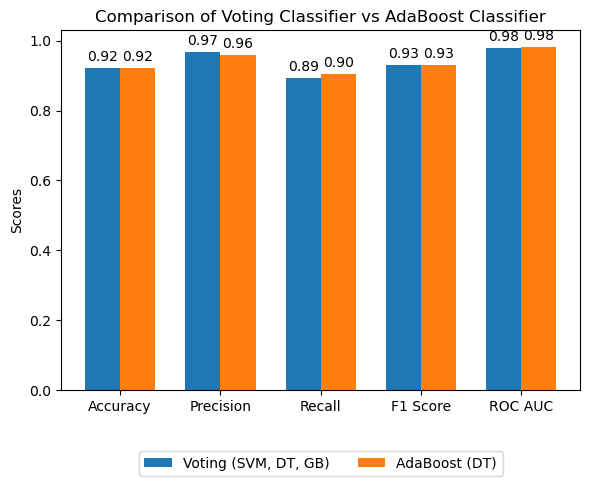

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Define metrics and their values for both classifiers
metrics_names = list(voting_metrics.keys())
voting_values = list(voting_metrics.values())
ab_values = list(ab_metrics.values())

x = np.arange(len(metrics_names))
width = 0.35

fig, ax = plt.subplots(figsize=(6, 5))
rects1 = ax.bar(x - width/2, voting_values, width, label='Voting (SVM, DT, GB)')
rects2 = ax.bar(x + width/2, ab_values, width, label='AdaBoost (DT)')

# Add labels, title, and legend
ax.set_ylabel('Scores')
ax.set_title('Comparison of Voting Classifier vs AdaBoost Classifier')
ax.set_xticks(x)
ax.set_xticklabels(metrics_names)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4)
# Function to autolabel the bars with their values
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Call autolabel for both sets of bars
autolabel(rects1)
autolabel(rects2)

# Adjust layout and display plot
fig.tight_layout()
plt.show()


In [13]:
# Determine the best model based on all metrics
best_model = max([voting_metrics, ab_metrics], key=lambda x: (
    x['Accuracy'], x['Precision'], x['Recall'], x['F1 Score'], x['ROC AUC']))

if best_model == voting_metrics:
    print("\nBest model based on all metrics: Voting Classifier (SVM, DT, GB)")
else:
    print("\nBest model based on all metrics: AdaBoost Classifier")



Best model based on all metrics: Voting Classifier (SVM, DT, GB)
